# 1- Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama    : Reyki seprianza

Batch   : 009


# 2- Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang di gunakan dalam project


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 3- Data loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [100]:
#load datasheet
data = pd.read_csv('https://raw.githubusercontent.com/danupurnomo/hacktiv8-exercises/main/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing/Players%20-%20Fifa%202022%20-%20Simplified.csv')
data.head()

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


In [101]:
#Copy Datasheet duplikat 
data_copy = data.copy()

In [102]:
# Rename Columns
data.rename(columns={'ValueEUR':'Price', 'Overall': 'Rating'}, inplace=True)

In [103]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [104]:
#chek dataset
data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

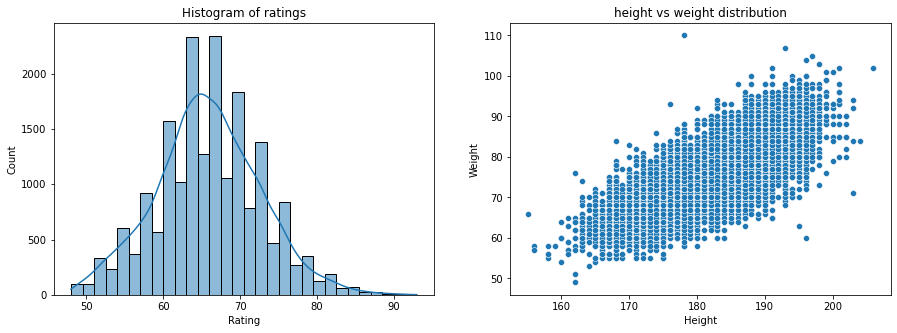

In [105]:
# Histogram
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.histplot(data['Rating'], bins=30,kde=True)
plt.title('Histogram of ratings')

plt.subplot(1,2,2)
sns.scatterplot(x= 'Height', y='Weight', data=data)
plt.title('height vs weight distribution')

plt.show()

# 5 -Data Preprocessing

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [106]:
# get data dor model inference
data_inf = data.sample(10, random_state=17)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [107]:
# Remove inference set drom dataset
data_train_rest = data.drop(data_inf.index)
data_train_rest

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [108]:
# Reset index agar tidak menimbulkan masalah
data_train_rest.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [109]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


## Splitting dataset

In [110]:
X = data_train_rest.drop(['Rating'], axis=1)
y = data_train_rest['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [111]:
y

0        93
1        92
2        91
3        91
4        91
         ..
19245    48
19246    48
19247    48
19248    48
19249    48
Name: Rating, Length: 19250, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.2, random_state=17)

print (X_train.shape)
print (X_test.shape)

(15400, 13)
(3850, 13)


## Handling Outlier
akan di bahas pada besok siang huft

## Handling Missing Values
akan di bahas besok pagi



misval gabole di drop saja di phase 1 dan 2

In [113]:
#check mising val on X_Train

X_train.isna().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [114]:
#Cheking misval on y_train
y_train.isna().sum()

0

In [115]:
# Check misval on X_test

X_test.isna().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [116]:
#check misval on y_test
y_test.isna().sum()

0

## Feature Selection

bisa pakai personal judgement atau perhitungan mtk

In [117]:
#Display Trainset
X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,Quintana,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,R. Manaj,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,E. Vergani,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,Talles Magno,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,Lee Bum Young,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Ricardo Ferreira,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,Bruno Jordão,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,Lino Essier,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


personal judge memnurut saya tidak ada hubunganya antara nama dan ratting, karena nama tidak ada keterhubungan maka bisa di drop

Karena 'Name' tidak ada hubunganya dengan 'Rating' maka bisa di asumsikan bahwa column ini di hilangkan. hal ini di buktikan dengan nama 'reyki ronaldo' tidak ada kaitanya dengan 'cristiano ronaldo' sehingga tidak ada kaitan apapun dengan 'rating'

In [118]:
# Drop colum 'Name'
#axis 1 kolom, 0 baris

X_train.drop('Name',axis=1,inplace=True)
X_test.drop('Name',axis=1, inplace=True)
X_train

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


## Featire encoding
pisahkan data antara numerik dan category

di numerik lakukan feature ecaling
di catogorii encoding
terus di gabungkan menjadi train set lagi baru namanya model train!!


BERBEDA YA

test non inferen juga sama perlakuanya sehingga menghasilkan mengasilkan test set, menjadi predict!!!


kenapa itu di split karena komputer tidak paham tulisan makanya valuenya harus di rubah menjadi angka
atau feature encoding

yg numerik akan di scalling agar tidak bias modelnya karena nanti ada model paporit dari model itu sendiri

## Split numerical columns and categorical columns

In [119]:
num_columns = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print(" Numeric columns:", num_columns)
print(" categorical columns:", cat_columns)

 Numeric columns: ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
 categorical columns: ['AttackingWorkRate', 'DefensiveWorkRate']


In [120]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]


In [121]:
X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,63,50,61,61,65,64
4199,24,182,76,3800000,69,72,54,70,28,69
12940,20,186,77,1100000,63,69,51,67,21,54
8147,19,186,70,2600000,85,52,55,76,21,60
15074,32,197,93,160000,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,49,32,45,47,69,59
406,25,174,72,28000000,86,75,73,86,32,62
13702,22,180,73,900000,64,55,60,68,49,60
2191,29,183,77,3500000,67,45,68,66,73,79


Kita akan mengubah scaling angka menjadi rentan 0-1

In [122]:
#training data merubah skalanya menjadi 0-1 ngebut banget euy, ini harus di lakukan biar model ga bias

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num) #Fit cuma bole di train

X_train_num_scaled = scaler.transform (X_train_num)
X_test_num_scaled = scaler.transform (X_test_num)
X_train_num_scaled


array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

---
## Feature Encoding

In [123]:
X_train_cat

,AttackingWorkRate,DefensiveWorkRate
9235,Medium,High
4199,Medium,Medium
12940,High,Medium
8147,High,Medium
15074,Medium,Medium
...,...,...
9529,Low,Medium
406,High,Low
13702,Medium,Medium
2191,Medium,Medium


akan mengenkripsi medium high low
sesuai abjad 0 1 2 

In [124]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[2., 0.],
       [2., 2.],
       [0., 2.],
       ...,
       [2., 2.],
       [2., 2.],
       [1., 2.]])

---
## Concat between numerical col and cat col

sekarang datanya akan di gabungkan kembali

In [125]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_enc], axis =1)

X_train_final

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.55555556, 2.        ,
        0.        ],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.63492063, 2.        ,
        2.        ],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.3968254 , 0.        ,
        2.        ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.49206349, 2.        ,
        2.        ],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.79365079, 2.        ,
        2.        ],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.73015873, 1.        ,
        2.        ]])

In [126]:
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,2.0,0.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,2.0,2.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,0.0,2.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,0.0,2.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,1.0,2.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,0.0,1.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,2.0,2.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,2.0,2.0


# 6-Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [127]:
#LINIER REGRESION NI gan

from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()

Metrics yang akan di pakai adalah 'MAE(Mean Absolute Error)'

# 7 -Model Training

>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [128]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8- Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [129]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_test


array([65.78084494, 62.00573956, 61.46750244, ..., 68.43040373,
       67.15757328, 71.56528223])

In [130]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('Error - Train:', mae_train)
print('Error - Test:', mae_test)


Error - Train: 2.361042732685607
Error - Test: 2.349492009480912


# 9- Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [131]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [132]:
#Remove column 'name'

data_inf2 = data_inf.drop('Name', axis=1)
data_inf2

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [133]:
#Split numerical and categorical columns

data_inf_num = data_inf2[num_columns]
data_inf_cat = data_inf2[cat_columns]

In [134]:
# Feature scaling and encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [135]:
#Concate between Num col and Cat Col

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns =[num_columns + cat_columns])
data_inf_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.421053,0.490196,0.362069,0.003479,0.652174,0.592105,0.588235,0.621212,0.441558,0.619048,0.0,1.0
1,0.289474,0.392157,0.448276,0.007732,0.623188,0.342105,0.485294,0.530303,0.649351,0.746032,2.0,2.0
2,0.105263,0.450980,0.275862,0.048969,0.826087,0.631579,0.588235,0.803030,0.376623,0.555556,0.0,1.0
3,0.552632,0.568627,0.551724,0.000567,0.565217,0.592105,0.617647,0.636364,0.428571,0.634921,2.0,2.0
4,0.026316,0.647059,0.500000,0.005670,0.492754,0.605263,0.544118,0.560606,0.246753,0.571429,2.0,2.0
5,0.131579,0.450980,0.500000,0.021649,0.681159,0.513158,0.617647,0.712121,0.688312,0.666667,2.0,0.0
6,0.236842,0.294118,0.310345,0.003222,0.652174,0.565789,0.441176,0.606061,0.324675,0.301587,0.0,2.0
7,0.210526,0.411765,0.344828,0.003995,0.492754,0.605263,0.352941,0.606061,0.337662,0.444444,2.0,2.0
8,0.078947,0.529412,0.327586,0.004639,0.608696,0.236842,0.382353,0.500000,0.597403,0.460317,2.0,2.0
9,0.315789,0.411765,0.379310,0.008247,0.695652,0.592105,0.558824,0.712121,0.350649,0.555556,2.0,2.0


In [138]:
# Predict Inference-set

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rating - Prediction'])
y_pred_inf_df

,Rating - Prediction
0,69.322716
1,68.123269
2,71.517242
3,70.422103
4,62.666168
5,72.016785
6,61.816243
7,62.879710
8,61.632516
9,68.507348


In [139]:
#concat inference set with prediction

pd.concat([data_inf, y_pred_inf_df],axis=1)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Rating - Prediction
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.322716
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.123269
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.517242
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.422103
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.666168
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,72.016785
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.816243
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,62.879710
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.632516
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.507348


# 10 - Pengambilan kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

In [140]:
#find Intercept and slope
intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_
print(intercept)
print(slope) # ini bisa juga di sebut koefesien

36.19892800541207
[ 7.66111977  2.52233197  1.419032   38.92962425  2.811425    2.60425313
  2.42803119 20.45000636  7.73316122 11.71164183 -0.16229389 -0.15990455]


In [141]:
data_inf.columns.tolist()

['Name',
 'Age',
 'Height',
 'Weight',
 'Price',
 'AttackingWorkRate',
 'DefensiveWorkRate',
 'PaceTotal',
 'ShootingTotal',
 'PassingTotal',
 'DribblingTotal',
 'DefendingTotal',
 'PhysicalityTotal',
 'Rating']